参见教材page 56，实现DQN算法。
使用cartpole环境测试，使用llama_Factory作为python环境，避免繁琐的torch配置。

In [1]:
%load_ext autoreload
%autoreload 2
from RL_utils import *
# dynamic picture
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
import gym
env = gym.make("CartPole-v0",render_mode="human")
config = Config(DBM=False) # 使用默认配置
if config.DBM:
    config.print_cfg()
capacity = 10000
warmup = capacity / 10
batchsize = 256
tau = 1 # 软更新参数,tau=1表示应跟新

e:\anaconda\envs\llama_factory\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [3]:
# DQN construction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if config.DBM:
    print(device)
model = SimpleNN(input_size=4,output_size=2,hidden_size=128,num_layers=2).to(device)
target_model = SimpleNN(input_size=4,output_size=2,hidden_size=128,num_layers=2).to(device)
optimizer = torch.optim.Adam(model.parameters(),lr = config.learning_rate,weight_decay=1e-5)
memory = ReplayMemory(capacity=capacity) # store (s_t,a_t,r_t,s_t+1)
epsilon = Epsilon()
rewards = [] # totalreward each episode
ten_avg_rewards = []
evaluated_rewards = [] # tuple like: (episode, rewards)
total_step_num = 0
evaluate_time = 10 # when evaluate 

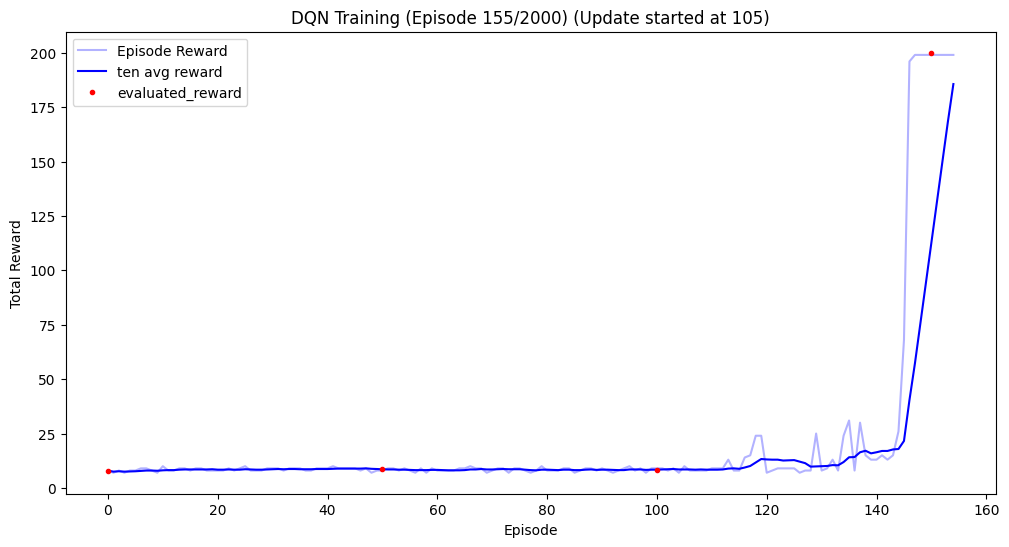

conversed now! 
evaluated_rewards:[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200.0]
training reward:[8, 7, 8, 7, 8, 8, 9, 9, 8, 7, 10, 8, 8, 9, 9, 8, 9, 9, 8, 8, 8, 8, 9, 8, 9, 10, 8, 8, 8, 9, 9, 9, 8, 9, 9, 9, 8, 8, 9, 9, 9, 10, 9, 9, 9, 9, 8, 9, 7, 8, 8, 9, 9, 8, 9, 8, 7, 9, 7, 9, 8, 8, 8, 8, 9, 9, 10, 9, 9, 7, 8, 9, 9, 7, 9, 9, 8, 7, 8, 10, 8, 8, 8, 9, 9, 7, 8, 9, 9, 8, 9, 8, 7, 8, 9, 10, 8, 9, 7, 9, 9, 9, 8, 9, 7, 10, 8, 8, 8, 8, 9, 9, 9, 13, 8, 8, 14, 15, 24, 24, 7, 8, 9, 9, 9, 9, 7, 8, 8, 25, 8, 9, 13, 8, 24, 31, 8, 30, 15, 13, 13, 15, 13, 15, 26, 68, 196, 199, 199, 199, 199, 199, 199, 199, 199]


<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

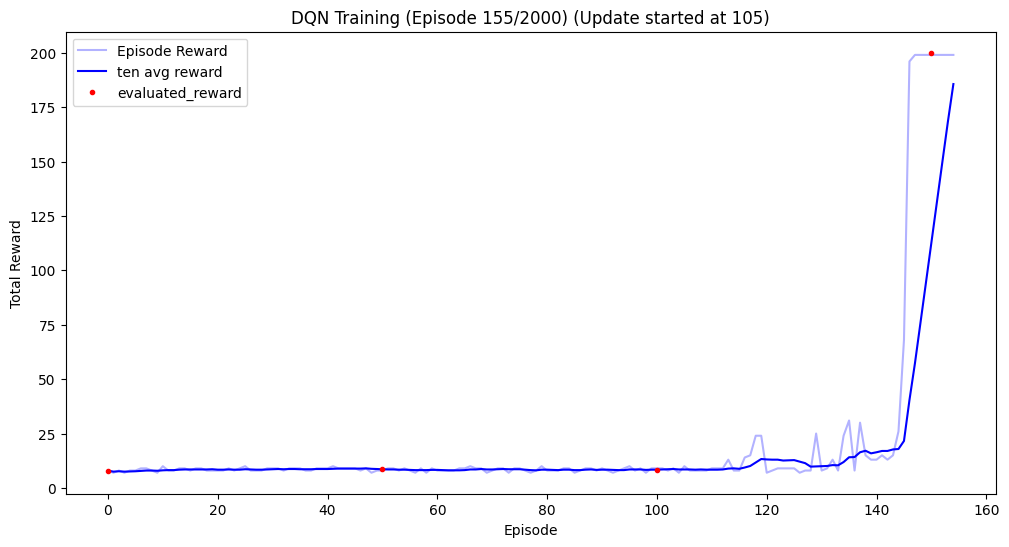

In [4]:
start_update_episode = None
CONVERSE = False
for episode_num in range(config.max_episode):
    state, info = env.reset()
    env.render()
    #print("episode:",episode_num)
    if config.DBM:
        print("state:",state)
    # step 1: rollout envs is just fine
    total_reward = 0
    total_step_this_episode = 0
    while True:
        action = select_action(state, env, model, config = config, device = device,epsilon=epsilon)
        next_state, reward, terminated, truncated, info = env.step(action)
        if terminated:
            reward = 0
        # if truncated:
        #     reward = 5
        memory.push(state,action,reward,next_state)
        total_reward += reward
        if terminated or truncated:
            #print("terminated reward:",reward)
            break
        state = next_state
        # step 2: update model, using DQN
        if len(memory) >= warmup:
            # print("update already started!")
            if start_update_episode is None:
                start_update_episode = episode_num
            update_model(model,target_model, memory, optimizer, gamma = config.gamma, device = device, config = config, batchsize = batchsize, total_step_num = total_step_num, tau = tau)
        total_step_num += 1
        total_step_this_episode += 1
    rewards.append(total_step_this_episode)
    ten_avg_rewards.append(np.mean(rewards[-10:]))
    if config.DBM:
        print_(rewards)
    # pic draw
    display.clear_output(wait=True)
    plt.clf()
    plt.figure(figsize=(12,6))
    plt.plot(rewards, 'b-', alpha = 0.3, label='Episode Reward')
    plt.plot(ten_avg_rewards,"b-", label="ten avg reward")
    if evaluated_rewards != []:
        x, y = zip(*evaluated_rewards)
        plt.plot(x, y, 'r.',label = "evaluated_reward")
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    if start_update_episode is None:
        plt.title(f'DQN Training (Episode {episode_num+1}/{config.max_episode})')
    else:
        plt.title(f'DQN Training (Episode {episode_num+1}/{config.max_episode}) (Update started at {start_update_episode})')
    plt.legend()
    display.display(plt.gcf())
    
    if ten_avg_rewards[-1] >= 175:
        print("conversed now! ")
        CONVERSE = True
    if episode_num % 50 == 0 or CONVERSE == True:
        save_model(model, filename=f"dqn_model_episode{episode_num}.pth") if not CONVERSE else save_model(model, filename=f"dqn_model_CONVERSE.pth")
        """evaluate added"""
        model_reward = []
        for i in range(evaluate_time):
            state, info = env.reset()
            episode_reward = 0
            while True:
                action = select_action(state=state,env=env,model=model,epsilon=Epsilon(0,0,0),config=config,device=device)
                state, reward, done, truncated, info = env.step(action)
                if done:
                    reward = 0
                # if truncated:
                #     reward = +5
                episode_reward += reward
                if done or truncated:
                    break
            model_reward.append(episode_reward)
        if CONVERSE:
            print(f"evaluated_rewards:{model_reward}")
            print(f"training reward:{rewards}")
            break
        evaluated_rewards.append((episode_num, np.mean(model_reward)))
    # 每10回合保存一次图像
    if episode_num % 500 == 0 or CONVERSE:
        plt.savefig(f'1data_saved/dqn_training_ep{episode_num}.png')
        save_data(rewards=rewards, filename=f"dqn_rewards_episode{episode_num}.pkl")

```
# evaluate the model
evaluate_time = 10
episodes = [0, 100, 200, 300, 400, 500, 600,700,800,900,1000, 1100, 1200,1300,1400,1500,1600,1700,1800,1900]
for episode_num in episodes:
    model_reward = []
    model.load_state_dict(torch.load(f"2model_trained/dqn_model_episode{episode_num}.pth"))
    for i in range(evaluate_time):
        state, info = env.reset()
        episode_reward = 0
        while True:
            action = select_action(state=state,env=env,model=model,epsilon=Epsilon(0,0,0),config=config,device=device)
            state, reward, done, truncated, info = env.step(action)
            if done:
                reward = -5
            if truncated:
                reward = +5
            episode_reward += reward
            if done or truncated:
                break
        model_reward.append(episode_reward)
    print(f"episode:{episode_num}, reward:{model_reward}, average_reward:{sum(model_reward)/evaluate_time}")
```

episode:0, reward:[11.0, 10.0, 9.0, 12.0, 10.0, 10.0, 12.0, 14.0, 11.0, 11.0], average_reward:11.0
episode:100, reward:[144.0, 128.0, 174.0, 142.0, 144.0, 129.0, 132.0, 123.0, 134.0, 130.0], average_reward:138.0
episode:200, reward:[97.0, 97.0, 88.0, 94.0, 94.0, 88.0, 97.0, 90.0, 90.0, 92.0], average_reward:92.7
episode:300, reward:[21.0, 25.0, 78.0, 28.0, 78.0, 79.0, 30.0, 77.0, 79.0, 83.0], average_reward:57.8
episode:400, reward:[10.0, 7.0, 10.0, 9.0, 10.0, 7.0, 10.0, 7.0, 8.0, 11.0], average_reward:8.9
episode:500, reward:[88.0, 86.0, 84.0, 82.0, 82.0, 81.0, 89.0, 82.0, 83.0, 86.0], average_reward:84.3
episode:600, reward:[83.0, 3.0, 91.0, 62.0, 4.0, 4.0, 88.0, 5.0, 4.0, 5.0], average_reward:34.9
episode:700, reward:[10.0, 8.0, 10.0, 6.0, 5.0, 12.0, 5.0, 9.0, 4.0, 10.0], average_reward:7.9
episode:800, reward:[7.0, 7.0, 6.0, 7.0, 9.0, 6.0, 7.0, 7.0, 9.0, 7.0], average_reward:7.2
episode:900, reward:[5.0, 7.0, 22.0, 12.0, 13.0, 13.0, 10.0, 17.0, 12.0, 13.0], average_reward:12.4
episode:1000, reward:[6.0, 9.0, 9.0, 8.0, 6.0, 9.0, 7.0, 7.0, 7.0, 6.0], average_reward:7.4
episode:1100, reward:[71.0, 78.0, 82.0, 77.0, 83.0, 77.0, 74.0, 72.0, 75.0, 78.0], average_reward:76.7
episode:1200, reward:[9.0, 19.0, 22.0, 35.0, 27.0, 23.0, 8.0, 20.0, 29.0, 16.0], average_reward:20.8
episode:1300, reward:[81.0, 5.0, 85.0, 85.0, 83.0, 86.0, 87.0, 87.0, 81.0, 85.0], average_reward:76.5
episode:1400, reward:[89.0, 87.0, 93.0, 88.0, 89.0, 95.0, 96.0, 91.0, 93.0, 94.0], average_reward:91.5
episode:1500, reward:[85.0, 84.0, 8.0, 85.0, 6.0, 5.0, 6.0, 83.0, 7.0, 85.0], average_reward:45.4
episode:1600, reward:[9.0, 12.0, 12.0, 10.0, 10.0, 11.0, 10.0, 12.0, 10.0, 11.0], average_reward:10.7
episode:1700, reward:[71.0, 80.0, 4.0, 84.0, 81.0, 83.0, 4.0, 84.0, 4.0, 82.0], average_reward:57.7
episode:1800, reward:[89.0, 7.0, 91.0, 88.0, 6.0, 6.0, 7.0, 6.0, 90.0, 5.0], average_reward:39.5
episode:1900, reward:[12.0, 12.0, 15.0, 12.0, 14.0, 13.0, 15.0, 11.0, 11.0, 14.0], average_reward:12.9

In [ ]:
0.99**100

0.3660323412732292